<a href="https://colab.research.google.com/github/Gennifer2001/tesis/blob/main/T%C3%A9sisjeje2_1xd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ***Importar librerías necesarias***

In [23]:
from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw
from statistics import mean

In [24]:
!pip install ete3
import ete3
from ete3 import Tree
import scipy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram,linkage,fcluster
from scipy.cluster import hierarchy
import networkx,pylab
import networkx as nx
from networkx.drawing.nx_pydot import graphviz_layout
from scipy.spatial.distance import pdist,squareform
import random
from IPython.display import display, Latex

### ***Cargar y limpiar base de datos***

In [25]:
 url = 'https://raw.githubusercontent.com/Gennifer2001/tesis/main/psyco.csv'
df = pd.read_csv(url)
df['age'] = df['age'].replace("Dec-18", "12-18", regex=True)
df

,age,gender,occupation,line_of_work,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,...,fam_connect,relaxed,self_time,like_hw,dislike_hw,prefer,certaindays_hw,Unnamed: 19,time_bp.1,travel+work
0,19-25,Male,Student in College,NaN,7,5,0.5,3,3,0.0,...,1.0,-0.5,-0.5,100,1,Complete Physical Attendance,Yes,NaN,7,NaN
1,12-18,Male,Student in School,NaN,7,11,0.5,4,2,-0.5,...,1.0,1.0,1.0,1111,1110,Complete Physical Attendance,No,NaN,7,NaN
2,19-25,Male,Student in College,NaN,7,7,1.5,2,2,1.0,...,0.5,0.5,0.5,1100,111,Complete Physical Attendance,Yes,NaN,7,NaN
3,19-25,Male,Student in College,NaN,7,7,1.5,3,1,0.0,...,0.0,-1.0,-0.5,100,1111,Complete Physical Attendance,Yes,NaN,7,NaN
4,19-25,Female,Student in College,NaN,7,7,1.5,2,2,0.0,...,0.0,0.5,0.0,1010,1000,Complete Physical Attendance,Yes,NaN,7,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1170,40-50,Female,Entrepreneur,NaN,9,9,0.5,2,1,0.5,...,0.5,0.0,0.0,10,1,Complete Physical Attendance,Yes,NaN,9,NaN
1171,26-32,Female,Homemaker,NaN,5,12,0.5,3,5,-0.5,...,0.0,-0.5,-0.5,100,111,Complete Physical Attendance,Maybe,NaN,5,NaN
1172,26-32,Male,Working Professional,Engineering,9,11,0.5,3,2,0.5,...,0.5,0.0,0.0,1111,110,Complete Physical Attendance,Maybe,NaN,9,NaN
1173,26-32,Male,Working Professional,Engineering,11,12,1.5,2,2,0.0,...,-1.0,0.0,-0.5,1111,1100,Complete Physical Attendance,Yes,NaN,11,NaN


In [26]:
df1 = df.drop(['age','gender', 'occupation','line_of_work','prefer','certaindays_hw','Unnamed: 19','travel+work','like_hw','dislike_hw','time_bp.1','Unnamed: 19'], axis=1)
nombres =['time_bp','time_dp','travel_time','easeof_online','home_env','prod_inc','sleep_bal','new_skill','fam_connect','relaxed','self_time']
df1

,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time
0,7,5,0.5,3,3,0.0,0.0,0.5,1.0,-0.5,-0.5
1,7,11,0.5,4,2,-0.5,0.5,-1.0,1.0,1.0,1.0
2,7,7,1.5,2,2,1.0,0.0,0.5,0.5,0.5,0.5
3,7,7,1.5,3,1,0.0,1.0,0.5,0.0,-1.0,-0.5
4,7,7,1.5,2,2,0.0,0.0,0.0,0.0,0.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1170,9,9,0.5,2,1,0.5,-0.5,-0.5,0.5,0.0,0.0
1171,5,12,0.5,3,5,-0.5,-1.0,-0.5,0.0,-0.5,-0.5
1172,9,11,0.5,3,2,0.5,0.5,0.5,0.5,0.0,0.0
1173,11,12,1.5,2,2,0.0,0.0,0.0,-1.0,0.0,-0.5


Eliminaremos todos las variables no numericas y las que no nos aportan información

In [27]:
# @title
df2 = df.drop(['gender', 'occupation','line_of_work','prefer','certaindays_hw','Unnamed: 19','travel+work','like_hw','dislike_hw','time_bp.1','Unnamed: 19'], axis=1)
imge = df2.head(10)
imge

,age,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time
0,19-25,7,5,0.5,3,3,0.0,0.0,0.5,1.0,-0.5,-0.5
1,12-18,7,11,0.5,4,2,-0.5,0.5,-1.0,1.0,1.0,1.0
2,19-25,7,7,1.5,2,2,1.0,0.0,0.5,0.5,0.5,0.5
3,19-25,7,7,1.5,3,1,0.0,1.0,0.5,0.0,-1.0,-0.5
4,19-25,7,7,1.5,2,2,0.0,0.0,0.0,0.0,0.5,0.0
5,19-25,5,7,0.5,4,4,-1.0,-1.0,0.0,-0.5,0.0,0.0
6,19-25,5,4,0.5,1,3,0.5,0.5,1.0,0.5,1.0,1.0
7,19-25,7,9,0.5,3,2,0.0,-0.5,-0.5,-1.0,-0.5,0.0
8,19-25,5,9,0.5,1,2,1.0,1.0,1.0,1.0,1.0,1.0
9,19-25,7,7,1.5,2,2,0.0,0.0,0.0,-1.0,0.0,0.0


### ***Clusterización***

In [28]:
seed = 42
np.random.seed(seed)
dfprueba = df2.sample(n=100)

Escalar los datos

In [29]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(dfprueba.drop(["age"],axis=1))

In [30]:
dfprueba.reset_index(drop=True,inplace=True)
ndf = pd.DataFrame(df_scaled, columns = [nombres])
ndf.loc[:,'age'] = dfprueba['age']
column_order = ['age','time_bp','time_dp','travel_time','easeof_online','home_env','prod_inc','sleep_bal','new_skill','fam_connect','relaxed','self_time']
ndf = ndf[column_order]

*Dendrograma*

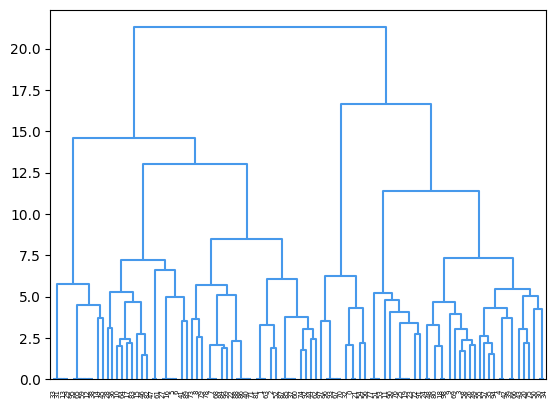

In [31]:
dendo=linkage(df_scaled, 'ward')
color = 'blue'
def color_func(x):
    rgb_color = (71, 153, 235)  # Por ejemplo, rojo en formato RGB
    hex_color = '#%02x%02x%02x' % rgb_color
    return hex_color

dendograma = sch.dendrogram(dendo, color_threshold=float('inf'), link_color_func=color_func)

### ***Cálculo de Sn***

Convertir el dendrograma en formato newick

In [32]:
def get_newick(node, parent_dist, leaf_names, newick='') -> str:
    """
    Convert sciply.cluster.hierarchy.to_tree()-output to Newick format.

    :param node: output of sciply.cluster.hierarchy.to_tree()
    :param parent_dist: output of sciply.cluster.hierarchy.to_tree().dist
    :param leaf_names: list of leaf names
    :param newick: leave empty, this variable is used in recursion.
    :returns: tree in Newick format
    """
    if node.is_leaf():
        return "%s:%.2f%s" % (leaf_names[node.id], parent_dist - node.dist, newick)
    else:
        if len(newick) > 0:
            newick = "):%.2f%s" % (parent_dist - node.dist, newick)
        else:
            newick = ");"
        newick = get_newick(node.get_left(), node.dist, leaf_names, newick=newick)
        newick = get_newick(node.get_right(), node.dist, leaf_names, newick=",%s" % (newick))
        newick = "(%s" % (newick)
        return newick

Convertir el dendrograma en cadena de texto

In [33]:
import ete3

def convertir_a_Tree(dendo, leaf_names):
    """
    Convierte la salida de scipy.cluster.hierarchy.to_tree a un objeto ete3.Tree.
    """
    tree1 = hierarchy.to_tree(dendo, False)
    newick_tree1 = get_newick(tree1, tree1.dist, leaf_names)
    tree = ete3.Tree(newick_tree1)

    return tree


arbol_resultante = convertir_a_Tree(dendo,leaf_names=range(0,100))
print(arbol_resultante.write(format=9))

((((((((34,30),50),((75,20),43)),(((66,39),(42,4)),(((94,35),57),55))),(((((49,26),(58,3)),69),9),(((98,18),80),(48,24)))),(((((91,72),(((23,19),25),76)),90),11),((53,51),77))),(((56,54),((21,0),32)),((((70,67),93),96),97))),(((((((62,44),(92,74)),(((60,37),85),87)),((52,2),((63,1),81))),((((((71,40),86),88),22),((99,84),((68,7),78))),((79,8),73))),((((89,41),(((6,5),16),27)),(61,47)),((((82,46),15),((83,17),(64,10))),(36,28)))),(((45,14),((((38,12),59),65),95)),(((29,13),31),33))));


Hallar todos los subárboles del dendrograma

In [39]:
from ete3 import Tree

def asignar_nombres(arbol):

    for i, nodo in enumerate(arbol.traverse()):  #Asigna nombres a los nodos si no tienen uno
        if not nodo.name:
            nodo.name = f"Nodo_{i}"

def obtener_subarboles(arbol):
    subarboles = []  #Inicializa una lista para almacenar los subárboles

    for nodo in arbol.traverse():  #Busca nodos descendientes del nodo iterado
        nodos_descendientes = arbol.search_nodes(name=nodo.name, order=1)

        subarbol = Tree()  #Construye un nuevo árbol con el nodo como raíz y sus descendientes
        subarbol.add_child(nodo.copy())

        for descendiente in nodos_descendientes:
            subarbol.add_child(descendiente.copy())

        subarboles.append(subarbol)

    return subarboles

#Función para obtener la representación en formato de texto de un subárbol
def obtener_texto(subarbol):
    return subarbol.write(format=9)

asignar_nombres(arbol_resultante)
todos_subarboles = obtener_subarboles(arbol_resultante)

# Imprimir la representación en formato de texto de cada subárbol
#for i, subarbol in enumerate(todos_subarboles):
 #   print(f"Subárbol {i + 1} - Representación en formato de texto:")
  #  print(obtener_texto(subarbol))
   # print("\n")

Determinar los n-subárboles

In [40]:
def obtener_n_subarboles(todos_subarboles, max_n=100):
    """
    Obtiene la lista de n-subárboles para cada valor de n hasta max_n.
    """
    n_subarboles = []

    for n in range(1, max_n + 1):
        n_subarbol = []
        for subarbol in subarboles:
            if len(subarbol) <= n:
                n_subarbol.append(subarbol)
        n_subarboles.append((n, n_subarbol))

    return n_subarboles

In [43]:
n_subs = obtener_n_subarboles(todos_subarboles,100)
#for n, subarboles in a:
 #   print(f"Subárboles con tamaño {n}:")
  #  for subarbol in subarboles:
   #     print(obtener_texto(subarbol))
    #print("\n")

Determinar los n-subárboles maximales

In [44]:
def es_contenido(subarbol1, subarbol2):
    """
    Verifica si subarbol1 está contenido en subarbol2.
    """
    raiz_subarbol1 = subarbol1.children[0]   #Obtiene el nodo raíz del subarbol1, accediendo al primer hijo del subárbol

    for nodo_subarbol2 in subarbol2.traverse():  #Itera sobre los nodos del subarbol2
        if nodo_subarbol2.name == raiz_subarbol1.name:  #Verifica si el nombre del nodo raíz de subarbol1 está en subarbol2
            return True
            break
    return False


def obtener_maximales(n_subarboles):
    """
    Obtiene los n-subarboles maximales a partir de la lista de n-subarboles.
    """
    maximales = []  #Inicializa una lista para los maximales en cada n
    subarboles_no_maximales = set()

    for n, subarboles in n_subarboles:
        subarboles_maximales = []  #Inicializa una lista para los maximales

        if n == 1:  #Los 1-subárboles siempre son maximales
            subarboles_maximales.extend(subarboles)
            maximales.append((n, subarboles_maximales))
        else:
            for subarbol in subarboles:
                if len(subarbol.get_leaf_names()) == n:  #Los n-subárboles con exactamente n hojas siempre son maximales
                    subarboles_maximales.append(subarbol)
                else:
                    es_maximal = True
                    for otro_subarbol in subarboles:  #Comprueba si el subárbol está contenido en otro subárbol
                        if subarbol != otro_subarbol and es_contenido(subarbol, otro_subarbol):
                            es_maximal = False
                            subarboles_no_maximales.add(subarbol)  #Agrega el subárbol no maximal al conjunto para no volver a revisarlo después
                            break

                    if es_maximal and subarbol not in subarboles_no_maximales:  #Verifica si es maximal y no se ha marcado como no maximal antes
                        subarboles_maximales.append(subarbol)

            maximales.append((n, subarboles_maximales))

    return maximales

maximales = obtener_maximales(n_subs)

# Imprimir o procesar la lista de n-subarboles maximales
#for n, subarboles in maximales:
 #   print(f"Subárboles maximales con tamaño {n}:")
  #  for subarbol in subarboles:
   #     print(obtener_texto(subarbol))
    #print("\n")

Calcular Sn

In [53]:
def calcular_sn(maximales):
    """
    Calcula y devuelve la lista Sn a partir de la lista de n-subárboles maximales.
    """
    Sn = []  # Inicializa la lista para los valores de Sn

    for n, subarboles in maximales:
        Sj = len(subarboles)  # Inicializa con la cantidad de n-subárboles maximales
        for subarbol in subarboles:
            Sj *= len(subarbol)  # Actualiza Sj con el valor de la operación
        Sn.append((n, Sj))

    return Sn

Sn = calcular_sn(maximales)
# Imprimir la lista Sn
for n, s in Sn:
    subindice = ''.join(chr(0x2080 + int(digito)) for digito in str(n))
    print(f"S{subindice}:", s)

S₁: 100
S₂: 1133871366144
S₃: 829406312792064
S₄: 6255800255250432
S₅: 5772902400000000
S₆: 2239488000000000
S₇: 938843136000000
S₈: 146313216000000
S₉: 88833024000000
S₁₀: 12541132800000
S₁₁: 662390784000
S₁₂: 662390784000
S₁₃: 77738918400
S₁₄: 20406466080
S₁₅: 20406466080
S₁₆: 20406466080
S₁₇: 4282838560
S₁₈: 4282838560
S₁₉: 4282838560
S₂₀: 4282838560
S₂₁: 4282838560
S₂₂: 4282838560
S₂₃: 4282838560
S₂₄: 4282838560
S₂₅: 608357750
S₂₆: 80223000
S₂₇: 80223000
S₂₈: 80223000
S₂₉: 80223000
S₃₀: 80223000
S₃₁: 80223000
S₃₂: 80223000
S₃₃: 80223000
S₃₄: 80223000
S₃₅: 80223000
S₃₆: 8751600
S₃₇: 8751600
S₃₈: 8751600
S₃₉: 8751600
S₄₀: 8751600
S₄₁: 8751600
S₄₂: 8751600
S₄₃: 681120
S₄₄: 681120
S₄₅: 681120
S₄₆: 65274
S₄₇: 65274
S₄₈: 65274
S₄₉: 65274
S₅₀: 65274
S₅₁: 65274
S₅₂: 65274
S₅₃: 65274
S₅₄: 4968
S₅₅: 4968
S₅₆: 4968
S₅₇: 4968
S₅₈: 4968
S₅₉: 4968
S₆₀: 4968
S₆₁: 4968
S₆₂: 4968
S₆₃: 4968
S₆₄: 4968
S₆₅: 4968
S₆₆: 4968
S₆₇: 4968
S₆₈: 4968
S₆₉: 4968
S₇₀: 4968
S₇₁: 4968
S₇₂: 4968
S₇₃: 4968
S₇₄: 4968


Encontrar el máximo y el n asociado

In [54]:
def encontrar_maximo_valor(Sn):
    maximo_valor = max(Sn, key=lambda x: x[1])
    print(f"Valor máximo en Sn: {maximo_valor}")

    k = maximo_valor[0]
    print(f"El valor de n es {k}")

encontrar_maximo_valor(Sn)

Valor máximo en Sn: (4, 6255800255250432)
El valor de n es 4


### ***Base topológica***

Función que agrupa el valor de Sn, n y la base, 3 codigos anteriores

In [55]:
def base_topologica(Sn, maximales):
    """
    Encuentra el valor máximo en Sn y los subárboles maximales correspondientes.
    Imprime la base topológica y devuelve la lista Base.
    """
    maximo_valor = max(Sn, key=lambda x: x[1])
    k = maximo_valor[0]

    n_subarboles_maximales = None

    for n, subarboles in maximales:
        if n == k:
            n_subarboles_maximales = subarboles
            break

    print(f"Valor máximo en Sn: {maximo_valor}")
    print(f"El valor de n es {k}")

    Base = []

    for subarbol in n_subarboles_maximales:
        y = []
        for node in subarbol.traverse():
            if node.is_leaf():
                elem = node.name
                y.append(elem)
        Base.append(y)

    subindice_k = ''.join(chr(0x2080 + int(digito)) for digito in str(k))
    print(f"Base topológica B{subindice_k}: {Base}")

    return Base



# Llamada a la función y asignación del resultado a la variable 'base_resultado'
Base_resultados=base_topologica(Sn, maximales)

Valor máximo en Sn: (4, 6255800255250432)
El valor de n es 4
Base topológica B₄: [['33', '31', '29', '13'], ['77', '53', '51'], ['56', '54'], ['32', '21', '0'], ['96', '93', '70', '67'], ['97'], ['45', '14'], ['11'], ['73', '79', '8'], ['61', '47'], ['36', '28'], ['65', '59', '38', '12'], ['95'], ['50', '34', '30'], ['43', '75', '20'], ['66', '39', '42', '4'], ['55', '57', '94', '35'], ['9'], ['80', '98', '18'], ['48', '24'], ['90'], ['62', '44', '92', '74'], ['87', '85', '60', '37'], ['52', '2'], ['81', '63', '1'], ['89', '41'], ['27', '16', '6', '5'], ['15', '82', '46'], ['83', '17', '64', '10'], ['49', '26', '58', '3'], ['69'], ['91', '72'], ['76', '25', '23', '19'], ['88', '86', '71', '40'], ['22'], ['99', '84'], ['78', '68', '7']]


In [51]:
A = ['4','9','18','42','43','46','79','84','98']
#A = ['12','38','59','65','95']

### ***Puntos de la base***

Para el subconjunto A

***Exterior***

In [56]:
def exterior(Base, A):
    """
    Calcula y muestra la extensión.
    """
    Ext = []

    for i in Base:
        if not any(elem in A for elem in i):
            Ext.extend(i)

    print(f"Exterior: {Ext}")

# Llamada a la función que imprimirá los resultados
exterior(Base_resultados, A)


Exterior: ['33', '31', '29', '13', '77', '53', '51', '56', '54', '32', '21', '0', '96', '93', '70', '67', '97', '45', '14', '11', '61', '47', '36', '28', '65', '59', '38', '12', '95', '50', '34', '30', '55', '57', '94', '35', '48', '24', '90', '62', '44', '92', '74', '87', '85', '60', '37', '52', '2', '81', '63', '1', '89', '41', '27', '16', '6', '5', '83', '17', '64', '10', '49', '26', '58', '3', '69', '91', '72', '76', '25', '23', '19', '88', '86', '71', '40', '22', '78', '68', '7']


***Interior***

In [57]:
def interior(Base,A):
    Int = []

    for i in Base:
        if all(elem in A for elem in i):
            Int.extend(i)
    print(Int)

interior(Base_resultados,A)


['9']


***Adherencia***

In [58]:
def adherencia(Base,A):
        Adh = []

        for i in Base:
          if any(elem in A for elem in i):
           Adh.extend(i)
        print(Adh)


adherencia(Base_resultados,A)

['73', '79', '8', '43', '75', '20', '66', '39', '42', '4', '9', '80', '98', '18', '15', '82', '46', '99', '84']


***Límite***

In [59]:
def limite(Base,A):
  Lim = []

  for i in Base:
    for m in i:
      if any(elem in A for elem in i if elem != m):
        Lim.append(m)
  print(Lim)


limite(Base_resultados,A)

['73', '8', '75', '20', '66', '39', '42', '4', '80', '98', '18', '15', '82', '99']


***Frontera***

In [60]:
def frontera(Base,A):
  Fr = []

  for i in Base:
      if any(elem in A for elem in i) and any(elem not in A for elem in i):
          Fr.extend(i)

  print(Fr)


frontera(Base_resultados,A)

['73', '79', '8', '43', '75', '20', '66', '39', '42', '4', '80', '98', '18', '15', '82', '46', '99', '84']


### ***Análisis topológico***

In [ ]:
#Para poder convertir age en cadena de texto
ndf['age'] = ndf['age'].astype(str, errors='raise')

Tomar los diferentes rangos de edades como subconjuntos a estudiar

In [ ]:
categorias_unicas = df['age'].unique()
print(categorias_unicas)

In [ ]:
edades1 = dfprueba[dfprueba['age']=='12-18']
#n = len(edades1)
edades1

Conjunto Adherenca de A

In [ ]:
indices_a_seleccionar = [66,39,42,4,73,8,43,20,80,98,18,15,82,46,99,84,9]
AdherenciaA = dfprueba.loc[indices_a_seleccionar]

# Imprimir las filas seleccionadas
AdherenciaA

Frontera de A

In [ ]:
indices_a_seleccionar = [73,79,8,43,75,20,66,39,42,4,80,98,18,15,82,46,99,84]
FronteraA = dfprueba.loc[indices_a_seleccionar]

# Imprimir las filas seleccionadas
FronteraA

In [ ]:
indices_a_seleccionar = [73,8,66,34,42,4,75,20,80,98,18,15,82,99]
LimiteA = dfprueba.loc[indices_a_seleccionar]

# Imprimir las filas seleccionadas
LimiteA

In [ ]:
indices_a_seleccionar = [1,2,3,26,49,52,58,63,81,33,31,29,13,77,53,51,56,54,32,21,0,96,93,70,67,97,45,14,11,61,47,36,28,65,59,38,12,95,50,34,30,55,57,94,35,48,24,90,62,44,92,74,87,85,60,37,52,89,41,27,16,6,5,83,17,64,10,69,91,72,76,25,23,19,88,86,71,40,22,78,68,7]
ExteriorA = dfprueba.loc[indices_a_seleccionar]

# Imprimir las filas seleccionadas
ExteriorA


In [ ]:
resumen_estadistico1 = edades1.iloc[:, 1:].describe().transpose()

# Imprimir los resultados
print(resumen_estadistico1)

In [ ]:
resumen_limite = LimiteA.iloc[:, 1:].describe().transpose()

# Imprimir los resultados
print(resumen_limite)

In [ ]:
resumen_frontera = FronteraA.iloc[:, 1:].describe().transpose()

# Imprimir los resultados
print(resumen_frontera)

In [ ]:
resumen_adherencia = AdherenciaA.iloc[:, 1:].describe().transpose()

# Imprimir los resultados
print(resumen_adherencia)

In [ ]:
resumen_exterior = ExteriorA.iloc[:, 1:].describe().transpose()

# Imprimir los resultados
print(resumen_exterior)

In [ ]:
edades2 = dfprueba[dfprueba['age']=='19-25']
#n = len(edades1)
edades2

In [ ]:
resumen_estadistico2 = edades2.iloc[:, 1:].describe().transpose()

# Imprimir los resultados
print(resumen_estadistico2)

In [ ]:
edades3 = dfprueba[dfprueba['age']=='26-32']
#n = len(edades1)
edades3

In [ ]:
resumen_estadistico3 = edades3.iloc[:, 1:].describe().transpose()

# Imprimir los resultados
print(resumen_estadistico3)

In [ ]:
edades4 = dfprueba[dfprueba['age']=='33-40']
#n = len(edades1)
edades4

In [ ]:
resumen_estadistico4 = edades4.iloc[:, 1:].describe().transpose()

# Imprimir los resultados
print(resumen_estadistico4)

In [ ]:
edades5 = dfprueba[dfprueba['age']=='40-50']
#n = len(edades1)
edades5

In [ ]:
resumen_estadistico5 = edades5.iloc[:, 1:].describe().transpose()

# Imprimir los resultados
print(resumen_estadistico5)

In [ ]:
edades6 = dfprueba[dfprueba['age']=='50-60']
#n = len(edades1)
edades6

In [ ]:
resumen_estadistico6 = edades6.iloc[:, 1:].describe().transpose()

# Imprimir los resultados
print(resumen_estadistico6)

In [ ]:
edades7 = dfprueba[dfprueba['age']=='60+']
#n = len(edades1)
edades7

In [ ]:
resumen_estadistico7 = edades7.iloc[:, 1:].describe().transpose()

# Imprimir los resultados
print(resumen_estadistico7)

In [ ]:
mean(resumen_estadistico1['std'])

In [ ]:
mean(resumen_estadistico2['std'])

In [ ]:
mean(resumen_estadistico3['std'])

In [ ]:
mean(resumen_estadistico4['std'])

In [ ]:
mean(resumen_estadistico5['std'])

In [ ]:
mean(resumen_estadistico6['std'])

In [ ]:
mean(resumen_estadistico7['std'])

### ***Segundo dataset***
```



In [61]:
 url = 'https://raw.githubusercontent.com/Gennifer2001/tesis/main/apple_quality.csv'
ds = pd.read_csv(url)
ds

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good
...,...,...,...,...,...,...,...,...,...
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good
3999,3999.0,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796456,good


In [62]:
ds1 = ds.drop(['Quality','A_id'], axis=1)
ds2= ds1.drop([4000],axis=0)
ds2

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036
...,...,...,...,...,...,...,...
3995,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784369
3996,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285
3997,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391
3998,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806


In [63]:
seed = 42
np.random.seed(seed)
dsprueba = ds2.sample(n=100)
nombres = ['Size','Weight','Sweetness','Crunchiness','Juiciness','Ripeness','Acidity']
dsprueba

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
555,3.099411,-1.691561,-3.679364,0.963606,0.538102,1.660099,-0.544761148
3491,1.439788,-0.223976,-0.061449,1.412705,0.885641,-2.191811,1.952776768
527,1.206786,-0.508979,1.736207,1.301011,-0.556149,-1.332052,1.009155619
3925,-1.612077,-1.554690,2.250267,-0.155060,-1.435862,2.388755,-0.487297287
2989,-1.962900,-0.506961,-2.388917,0.136195,-2.780126,1.623751,-1.636458548
...,...,...,...,...,...,...,...
1116,-1.575930,-1.184094,2.651745,-0.742934,-1.851141,1.993245,1.602278558
1320,-0.647327,-0.644687,-0.690439,0.245216,2.864540,-0.865275,2.474673276
3656,-1.527219,1.658761,-4.080015,0.860941,-0.974706,1.511822,0.422928552
1552,-0.196499,-1.534853,0.828281,1.717767,0.838220,1.396164,0.643928312


In [64]:
scaler = StandardScaler()
ds_scaled = scaler.fit_transform(dsprueba)

In [65]:
dsprueba.reset_index(drop=True,inplace=True)
nds = pd.DataFrame(ds_scaled, columns = [nombres])
nds

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
0,1.918977,-0.393105,-1.663858,-0.017620,0.110260,0.464512,-0.299310
1,1.027395,0.605837,0.166304,0.335485,0.304179,-1.685486,0.980745
2,0.902222,0.411844,1.075667,0.247665,-0.500308,-1.205599,0.497114
3,-0.612127,-0.299941,1.335710,-0.897173,-0.991169,0.871221,-0.269859
4,-0.800596,0.413218,-1.011072,-0.668174,-1.741239,0.444224,-0.858835
...,...,...,...,...,...,...,...
95,-0.592708,-0.047687,1.538802,-1.359390,-1.222886,0.650462,0.801105
96,-0.093845,0.319472,-0.151878,-0.582455,1.408362,-0.945061,1.248231
97,-0.566540,1.887362,-1.866532,-0.098340,-0.733854,0.381749,0.196657
98,0.148349,-0.286439,0.616383,0.575341,0.277719,0.317193,0.309925


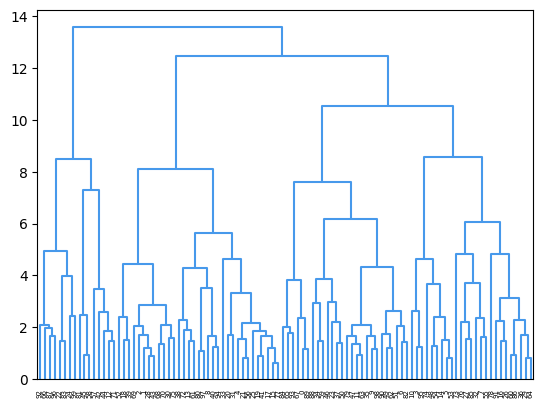

In [66]:
dendro=linkage(ds_scaled, 'ward')
color = 'blue'
def color_func(x):
    rgb_color = (71, 153, 235)  # Por ejemplo, rojo en formato RGB
    hex_color = '#%02x%02x%02x' % rgb_color
    return hex_color

dendograma2 = sch.dendrogram(dendro, color_threshold=float('inf'), link_color_func=color_func)

CONVERTIR DE DENDO A NEWICK

In [67]:
leaf_names2 = range(0, 100)
tree2 = hierarchy.to_tree(dendro, False)
newick_tree2 = get_newick(tree2, tree2.dist, leaf_names2)
treee = ete3.Tree(newick_tree2)

print(newick_tree2)

((((((((((64:0.82,29:0.82):0.88,36:1.70):0.59,(86:0.93,60:0.93):1.37):0.83,((26:1.47,16:1.47):0.77,91:2.24):0.89):1.70,78:4.83):1.21,((((55:1.64,7:1.64):0.73,32:2.36):1.34,((85:1.54,27:1.54):0.66,76:2.20):1.51):1.11,73:4.82):1.23):2.54,(((((53:0.83,5:0.83):0.67,14:1.50):0.91,(54:1.29,48:1.29):1.12):1.28,74:3.69):0.96,((95:1.25,3:1.25):1.36,10:2.62):2.03):3.93):1.94,((((((82:1.43,6:1.43):0.64,51:2.07):0.57,((62:1.20,49:1.20):0.54,90:1.74):0.90):1.70,(((98:1.16,9:1.16):0.53,35:1.69):0.40,(((63:0.94,11:0.94):0.44,47:1.38):0.29,79:1.67):0.42):2.26):1.83,((((50:1.38,37:1.38):0.83,23:2.21):0.75,46:2.96):0.90,((59:1.48,34:1.48):1.48,88:2.95):0.91):2.31):1.41,(((89:1.15,0:1.15):1.22,67:2.37):1.46,((93:1.79,65:1.79):0.21,84:2.00):1.83):3.76):2.93):1.93,(((((((((77:0.62,15:0.62):0.60,17:1.22):0.45,(41:0.91,19:0.91):0.77):0.18,25:1.85):0.31,((56:0.81,21:0.81):0.74,4:1.55):0.61):1.15,(31:1.72,20:1.72):1.60):1.30,33:4.62):1.02,((((94:1.24,40:1.24):0.41,8:1.65):1.85,(97:1.09,80:1.09):2.41):0.78,(((6

In [ ]:
from ete3 import Tree

def asignar_nombres(arbol):

    for i, nodo in enumerate(arbol.traverse()):  #Asigna nombres a los nodos si no tienen uno
        if not nodo.name:
            nodo.name = f"Nodo_{i}"

def obtener_subarboles(arbol):
    subarboles = []  #Inicializa una lista para almacenar los subárboles

    for nodo in arbol.traverse():  #Busca nodos descendientes del nodo iterado
        nodos_descendientes = arbol.search_nodes(name=nodo.name, order=1)

        subarbol = Tree()  #Construye un nuevo árbol con el nodo como raíz y sus descendientes
        subarbol.add_child(nodo.copy())

        for descendiente in nodos_descendientes:
            subarbol.add_child(descendiente.copy())

        subarboles.append(subarbol)

    return subarboles

#Función para obtener la representación en formato de texto de un subárbol
def obtener_texto(subarbol):
    return subarbol.write(format=9)

asignar_nombres(treee)
todos_subarboles = obtener_subarboles(treee)

In [ ]:
n_subarboles = []  #Inicializa la lista para los n-subárboles

for n in range(1, 1001):  #El rango es igual a la cantidad de datos usados
    n_subarbol = []  #Inicializa la lista para cada valor de n
    for subarbol in todos_subarboles:
        if len(subarbol) <= n:  #Busca los subárboles que tienen n o menos hojas
            n_subarbol.append(subarbol)
    n_subarboles.append((n, n_subarbol))  #Agrega la lista de n-subárboles a la lista general

In [ ]:
def es_contenido(subarbol1, subarbol2):
    """
    Verifica si subarbol1 está contenido en subarbol2.
    """
    raiz_subarbol1 = subarbol1.children[0]   #Obtiene el nodo raíz del subarbol1, accediendo al primer hijo del subárbol

    for nodo_subarbol2 in subarbol2.traverse():  #Itera sobre los nodos del subarbol2
        if nodo_subarbol2.name == raiz_subarbol1.name:  #Verifica si el nombre del nodo raíz de subarbol1 está en subarbol2
            return True
            break
    return False


def obtener_maximales(n_subarboles):
    """
    Obtiene los n-subarboles maximales a partir de la lista de n-subarboles.
    """
    maximales = []  #Inicializa una lista para los maximales en cada n
    subarboles_no_maximales = set()

    for n, subarboles in n_subarboles:
        subarboles_maximales = []  #Inicializa una lista para los maximales

        if n == 1:  #Los 1-subárboles siempre son maximales
            subarboles_maximales.extend(subarboles)
            maximales.append((n, subarboles_maximales))
        else:
            for subarbol in subarboles:
                if len(subarbol.get_leaf_names()) == n:  #Los n-subárboles con exactamente n hojas siempre son maximales
                    subarboles_maximales.append(subarbol)
                else:
                    es_maximal = True
                    for otro_subarbol in subarboles:  #Comprueba si el subárbol está contenido en otro subárbol
                        if subarbol != otro_subarbol and es_contenido(subarbol, otro_subarbol):
                            es_maximal = False
                            subarboles_no_maximales.add(subarbol)  #Agrega el subárbol no maximal al conjunto para no volver a revisarlo después
                            break

                    if es_maximal and subarbol not in subarboles_no_maximales:  #Verifica si es maximal y no se ha marcado como no maximal antes
                        subarboles_maximales.append(subarbol)

            maximales.append((n, subarboles_maximales))

    return maximales

maximales = obtener_maximales(n_subarboles)